# Online_Retail_EDA
## About the Dataset

- This is a transactional data set which contains all the transactions occured between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.
- .The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

- The dataset is taken from the UCI repository [online retail dataset](https://archive.ics.uci.edu/ml/datasets/Online+Retail).

## Attribute Information 

This dataframe contains 8 variables that correspond to:

**InvoiceNo**: Invoice number. ***Nominal***, a 6-digit integral number uniquely assigned to each transaction. **If this code starts with letter 'c', it indicates a cancellation.** <br>
**StockCode**: Product (item) code. ***Nominal***, a 5-digit integral number uniquely assigned to each distinct product. <br>
**Description**: Product (item) name. ***Nominal***. <br>
**Quantity**: The quantities of each product (item) per transaction. ***Numeric***.<br> 
**InvoiceDate**: Invoice Date and time. ***Numeric***, the day and time when each transaction was generated. <br>
**UnitPrice**: Unit price. ***Numeric***, Product price per unit in sterling. <br>
**CustomerID**: Customer number. ***Nominal***, a 5-digit integral number uniquely assigned to each customer. <br>
**Country**: Country name. ***Nominal***, the name of the country where each customer resides.<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# **Exploratory Data Analysis**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#load the dataset
df = pd.read_excel("/content/drive/MyDrive/Online Retail.xlsx")

In [4]:
#shape of the dataset
print("The shape of the dataset is: ", df.shape)

The shape of the dataset is:  (541909, 8)


In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### Summary of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### **Observations**
* The dataset is has **541909** rows and **8** columns. 
* There are null values for the features **CustomerID** and **Description**. This has to be treated during the datacleaning step.
* This Dataset has four object type columns, three numerical type columns and one datetime feature. 


In [8]:
Features = df.columns

# Creating a DataFrame with useful information about dataset
data_info = pd.DataFrame()
data_info['Features'] = Features
data_info['unique_values'] = [df[col].nunique() for col in Features]
data_info['total_null'] = [df[col].isnull().sum() for col in Features]
data_info['null_percent'] = [df[col].isnull().sum() * 100 / len(df) for col in Features]

data_info.style.background_gradient()

,Features,unique_values,total_null,null_percent
0,InvoiceNo,25900,0,0.000000
1,StockCode,4070,0,0.000000
2,Description,4223,1454,0.268311
3,Quantity,722,0,0.000000
4,InvoiceDate,23260,0,0.000000
5,UnitPrice,1630,0,0.000000
6,CustomerID,4372,135080,24.926694
7,Country,38,0,0.000000


#### **Observations**
- The number of null values in **customerid** is quite large and that would impact the results.
- Number of unique values for **description** and **stock code** varies.

### **Numerical data analysis**

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


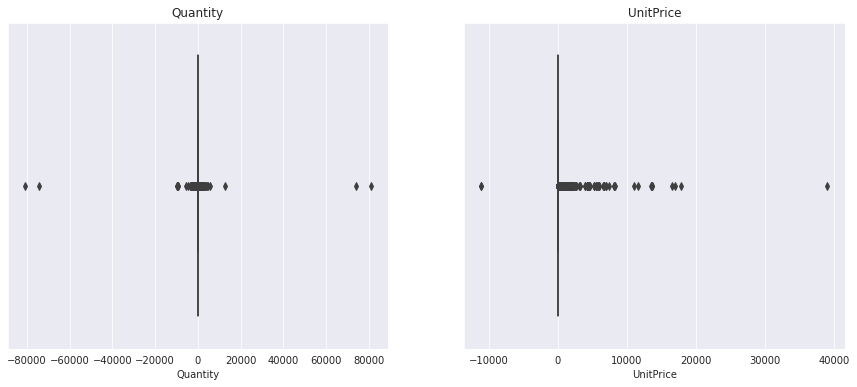

In [10]:
# Boxplot on numerical features
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(15,6))
sns.boxplot(x = df['Quantity'],ax=ax1)
ax1.title.set_text('Quantity')
sns.boxplot(x = df['UnitPrice'],ax=ax2)
ax2.title.set_text('UnitPrice')
plt.show()

#### **Observations**
- There are **negative values** for both **Quantity** and **Price**. This may be the values for the products which was returned or cancelled. 
- The data is positively skewed as mean > median.

## **Analysis on Cancelled Order**
- Order whose Invoice starts with **'C'** is identified as Cancelled orders

In [11]:
#get canceled transactions
cancelled_orders = df[df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [12]:
cancelled_orders.shape

(9288, 8)

### Check if the quantity is in negative for the cancelled orders

In [13]:
cancelled_orders[cancelled_orders['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


#### **Observations**
- The above said statement for negative values for quantity holds True for the Cancelled Orders.

### Check if all the Orders with negative quantities has Invocie number with prefix - 'C'

In [14]:
d1 = df[df['Quantity']<0]
d1 = d1[~(d1['InvoiceNo'].astype(str).str.contains('C'))]
d1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


In [15]:
d1.Description.value_counts().head(10)

check                     120
damages                    45
damaged                    42
?                          41
sold as set on dotcom      20
Damaged                    14
thrown away                 9
Unsaleable, destroyed.      9
??                          7
wet damaged                 5
Name: Description, dtype: int64

In [16]:
d1.CustomerID.unique()

array([nan])

#### **Observations**
- Not only the Cancelled orders(Invoice prefix - 'C') has negative quantities, there are **miscellaneous reasons** such as Lost, Missing, ?, Damaged, Breakages, Unsaleable, Barcode problems, etc.
- Also, these products were not purchased by any customers and hence negative quantities. So, Considering these orders also as Cancelled orders.

In [17]:
cancelled_orders1 = df[(df['InvoiceNo'].astype(str).str.contains('C')) & (df['Quantity']<0)]
cancelled_orders1['InvoiceNo'].nunique()/df['InvoiceNo'].nunique()

0.14810810810810812

#### **Observations**
- **14%** of the orders out of total orders, has been cancelled for various reasons.

## **Data Cleaning**

### Missing Value Analysis

In [18]:
# Convert missing values of Description to Missing
df['Description'] = df['Description'].fillna('Missing')
df['Description'].isnull().sum()

0

In [19]:
df['Description'].nunique(),df['StockCode'].nunique()

(4223, 4070)

#### **Observations**
- Number of unique values for description and stock code varies.

In [20]:
# Understand the records which has missing values for description - to fill correct value from the existing descriptions.
desc_miss = df[df['Description'] == 'Missing']
desc_miss.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,Missing,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,Missing,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,Missing,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,Missing,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,Missing,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [21]:
desc_miss.CustomerID.unique(),desc_miss.UnitPrice.unique(),desc_miss.Quantity.unique()

(array([nan]),
 array([0.]),
 array([   56,     1,     3,    23,   -10,   -38,    19,    57,   -20,
           -6,   110,   -22,    70,    -2,   -30,   -70,  -130,   -80,
         -120,   -40,    -5,   -12,   -25,   -14,   -15,   -69,    -3,
         -140,  -320,     5,   -24,   -21,   120,     7,    10,    13,
          -19,   -11,   -18,   -44,   -50,    -9,   -77,     2,  -223,
          144,    34,     8,    30,    -4,    -1,    27,  -150,  -177,
           46,    79,    84,     9,   -32,   288,   -28,  -145,    25,
          460,    12,    36,   -36,   -48,   -60,  -939,  -100,    35,
          -54,  -201,   -53,    -8,   -45,   -13,  1000,   -61,   -41,
          -35,   -64,   -84,   -16,   192,   -31,    65,   -17,  5568,
         2560,   136,     4,   -52,  -206,   320,   960,    60,  -217,
           18,  1287,  -173,  -234,   118,   -57,   -42,     6,    26,
           -7,   -99,    51,   -92,  -114,   -88,   -33,  -391,   -87,
           20,    16,  -278,   140,    67,    47

#### **Observations**
- For all the missing records of descriptions, the customer id is also missing.
- Further, the unitprice is 0 for all the records and the Quantity has negative values. 
- This indicated that these orders are cancelled.
- **So, no need to treat missing values for Descriptions as they will be removed if the customerIds are dropped**.  

### Dropping Missing values 
- Customer Ids cannot be imputed and hence dropping all the missing records.

In [22]:
data = df.dropna()
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Check for duplicate records

In [23]:
duplicates = data[data.duplicated(keep=False)]
duplicates.shape

(10062, 8)

- There are 10062 duplicate records in total. So, drop the duplicates.

In [24]:
data1 = data.drop_duplicates(keep = 'first')
data1.shape

(401604, 8)

In [25]:
# Summary of the cleaned data
Features = data1.columns

# Creating a DataFrame with useful information about dataset
data_info = pd.DataFrame()
data_info['Features'] = Features
data_info['unique_values'] = [data1[col].nunique() for col in Features]
data_info['total_null'] = [data1[col].isnull().sum() for col in Features]
data_info['null_percent'] = [data1[col].isnull().sum() * 100 / len(data1) for col in Features]

data_info.style.background_gradient()

,Features,unique_values,total_null,null_percent
0,InvoiceNo,22190,0,0.000000
1,StockCode,3684,0,0.000000
2,Description,3896,0,0.000000
3,Quantity,436,0,0.000000
4,InvoiceDate,20460,0,0.000000
5,UnitPrice,620,0,0.000000
6,CustomerID,4372,0,0.000000
7,Country,37,0,0.000000


#### **Observations**
* The unique values for Stockcode is not same as description's.
* This shows that few Stockcodes has multiple descriptions. This seems to be a data quality issue and has to be analyzed.

In [26]:
# Filter only distinct stock code and description
fill_desc = data1.drop_duplicates(subset=['StockCode','Description'],keep='first')
fill_desc.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [27]:
fill_desc['StockCode'].value_counts()[fill_desc.StockCode.value_counts()>1]

23236     4
23196     4
23396     3
17107D    3
23244     3
         ..
21928     2
23194     2
20725     2
23380     2
23545     2
Name: StockCode, Length: 213, dtype: int64

- There are 213 Stock code with multiple descriptions

In [28]:
# Example of a stockcode which has multiple Descriptions
data1[data1['StockCode'] == 23196]['Description'].unique()

array(['RETRO LEAVES MAGNETIC NOTEPAD',
       'RETO LEAVES MAGNETIC SHOPPING LIST',
       'LEAVES MAGNETIC  SHOPPING LIST', 'VINTAGE LEAF MAGNETIC NOTEPAD'],
      dtype=object)

**Observations:** 
- Data cleaning for multiple descriptions is difficult as its impossible to find the correct description and hence not treating it.

## **Convert Customer Id to Integer type**

In [29]:
retail_df = data1.copy()
retail_df['CustomerID']=retail_df['CustomerID'].astype('int')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## **Feature Engineering - Total_Price, Date, Year, Quarter, Year_Month, Month, Day, Hour**

In [30]:
retail_df['Total_Price'] = retail_df['UnitPrice'] * retail_df['Quantity']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [31]:
retail_df.insert(loc=5, column='Date', value=retail_df['InvoiceDate'].dt.date)
retail_df.insert(loc=6, column='Year', value=retail_df['InvoiceDate'].dt.year)
retail_df.insert(loc=7, column='Year_Month', value=retail_df['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m')))
retail_df.insert(loc=8, column='Quarter', value=retail_df['InvoiceDate'].dt.quarter)
retail_df.insert(loc=9, column='Month', value=retail_df['InvoiceDate'].dt.month)
retail_df.insert(loc=10, column='Day', value=retail_df['InvoiceDate'].dt.dayofweek)  
retail_df.insert(loc=11, column='Hour', value=retail_df['InvoiceDate'].dt.hour)
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Date,Year,Year_Month,Quarter,Month,Day,Hour,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010-12-01,2010,2010-12,4,12,2,8,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010-12-01,2010,2010-12,4,12,2,8,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2010-12-01,2010,2010-12,4,12,2,8,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2010-12-01,2010,2010-12,4,12,2,8,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2010-12-01,2010,2010-12,4,12,2,8,3.39,17850,United Kingdom,20.34


In [32]:
# Summary of the cleaned data
Features = retail_df.columns

# Creating a DataFrame with useful information about dataset
data_info = pd.DataFrame()
data_info['Features'] = Features
data_info['unique_values'] = [retail_df[col].nunique() for col in Features]
data_info['total_null'] = [retail_df[col].isnull().sum() for col in Features]
data_info['null_percent'] = [retail_df[col].isnull().sum() * 100 / len(retail_df) for col in Features]

data_info.style.background_gradient()

,Features,unique_values,total_null,null_percent
0,InvoiceNo,22190,0,0.000000
1,StockCode,3684,0,0.000000
2,Description,3896,0,0.000000
3,Quantity,436,0,0.000000
4,InvoiceDate,20460,0,0.000000
5,Date,305,0,0.000000
6,Year,2,0,0.000000
7,Year_Month,13,0,0.000000
8,Quarter,4,0,0.000000
9,Month,12,0,0.000000


## **Overall Best Selling products** 

In [33]:
# Top 10 best sellers
retail_df.groupby(['StockCode','Description'])['Total_Price'].sum().sort_values(ascending=False).head(10)

StockCode  Description                       
22423      REGENCY CAKESTAND 3 TIER              132567.70
85123A     WHITE HANGING HEART T-LIGHT HOLDER     93767.80
85099B     JUMBO BAG RED RETROSPOT                83056.52
47566      PARTY BUNTING                          67628.43
POST       POSTAGE                                66710.24
84879      ASSORTED COLOUR BIRD ORNAMENT          56331.91
23084      RABBIT NIGHT LIGHT                     51042.84
79321      CHILLI LIGHTS                          45915.41
22086      PAPER CHAIN KIT 50'S CHRISTMAS         41423.78
22502      PICNIC BASKET WICKER 60 PIECES         39619.50
Name: Total_Price, dtype: float64

## **Year_Month Sales Trend**

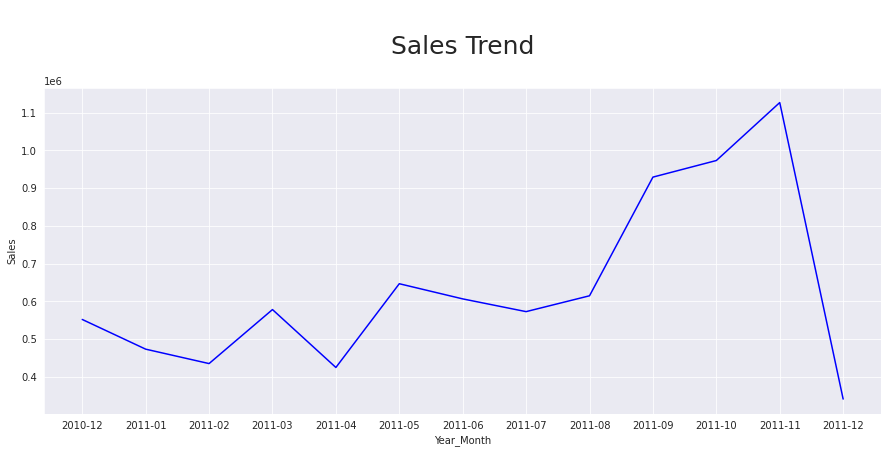

In [34]:
plt.figure(figsize=(15,6))
plt.plot(retail_df.groupby(['Year_Month'])['Total_Price'].sum(), color='b')
plt.ylabel('Sales')
plt.xlabel('Year_Month')
plt.title("\n Sales Trend \n", size=25)
plt.show()

#### **Observations**
- Sales is high during the month of **November** which could be for various reasons such as Christmas, Thanksgiving and Black Friday sales and the top 10 best selling products also matches the occasion.
- There is an increasing Trend in the sales and peaks and troughs are seen.

## **Year_Quarter wise sales**

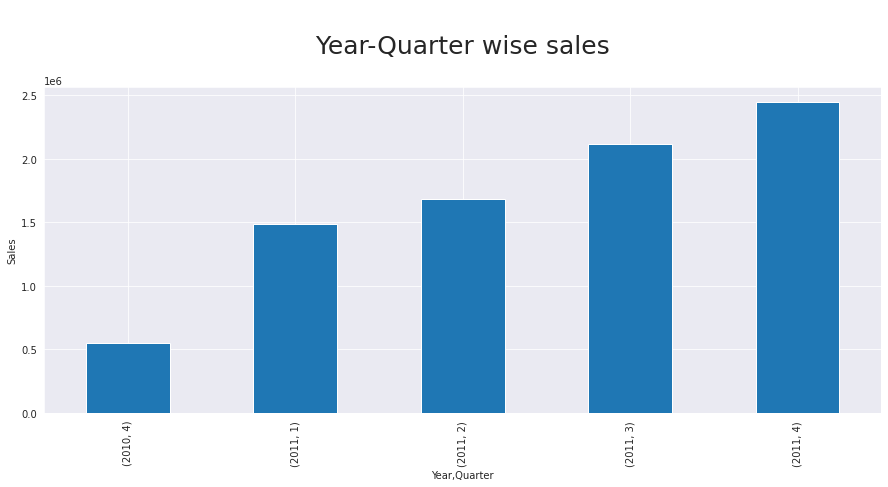

In [35]:
plt.figure(figsize=(15,6))
retail_df.groupby(['Year','Quarter'])['Total_Price'].sum().plot(kind='bar') 
plt.ylabel('Sales')
plt.title("\n Year-Quarter wise sales \n", size=25)
plt.show()

## **Percentage of sales in November in 2011**

In [36]:
Nov_sales_2011 = retail_df[retail_df['Year_Month'] == '2011-11']['Total_Price'].sum()
Tot_sales_2011 = retail_df.groupby(['Year'])['Total_Price'].sum()[1:]
Nov_sales_2011,Tot_sales_2011

(1126815.07, Year
 2011    7.726147e+06
 Name: Total_Price, dtype: float64)

In [37]:
1126815.07/7.726147e+06*100

14.58443736574

#### **Observations**
- **14.58%** of the total sales in the year 2011 is contributed by the month November

## **Day of week Sales**

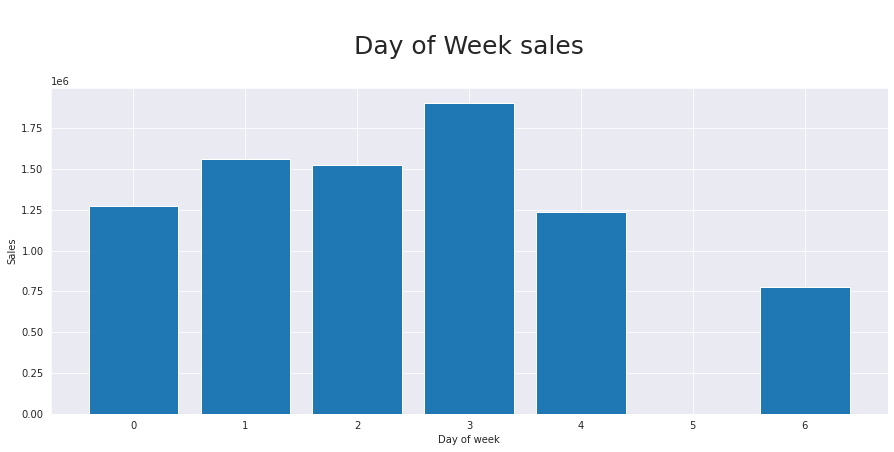

In [38]:
DOW_sales = pd.DataFrame(retail_df.groupby('Day')['Total_Price'].sum())
plt.figure(figsize=(15,6))
plt.bar(DOW_sales.index,DOW_sales['Total_Price'])
plt.ylabel('Sales')
plt.xlabel('Day of week')
plt.title("\n Day of Week sales \n", size=25)
plt.show()

#### **Observations**
- More sales on day 3 of the week (Thursday).

## **Sales Trend On November**

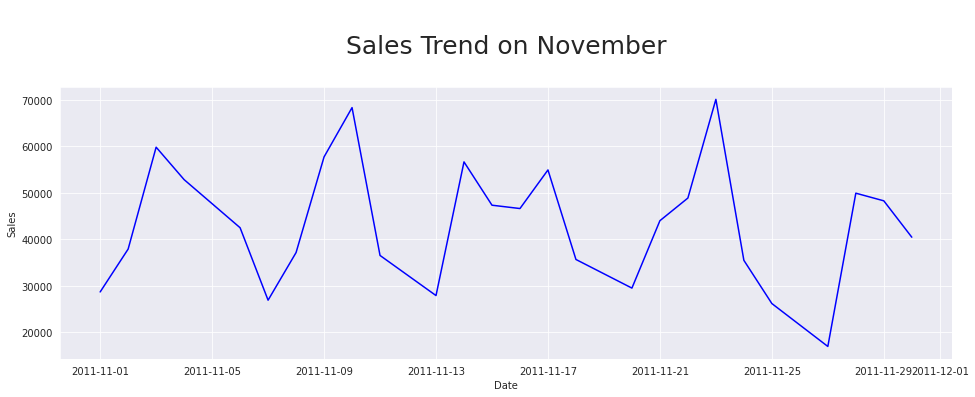

In [39]:
plt.figure(figsize=(16,5))
plt.plot(retail_df[retail_df['Year_Month'] == '2011-11'].groupby('Date')['Total_Price'].sum(), color='b')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.title("\n Sales Trend on November \n", size=25)
plt.show()

#### **Observations**
- Sales have high peaks on 9th of November and 24th of November(Black Friday Sales)

## **Hourly sales**

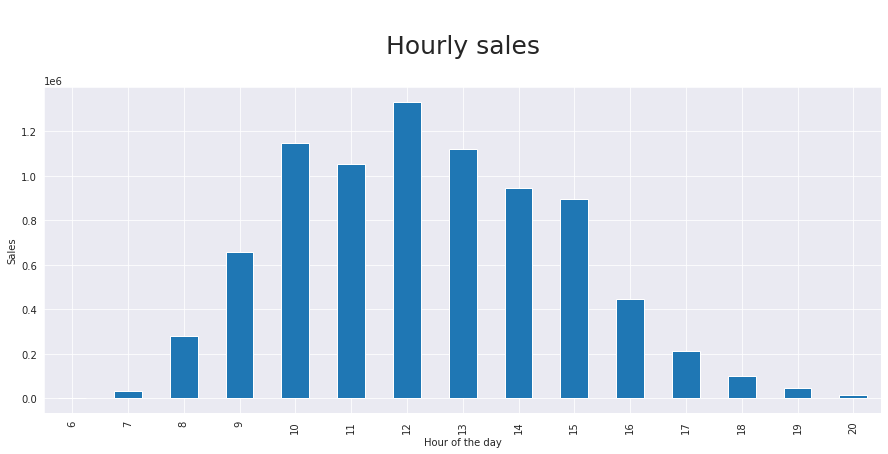

In [40]:
plt.figure(figsize=(15,6))
retail_df.groupby(['Hour'])['Total_Price'].sum().plot(kind='bar') 
plt.ylabel('Sales')
plt.xlabel('Hour of the day')
plt.title("\n Hourly sales \n", size=25)
plt.show()

#### **Observations**
- Peak hours are around mid of the day which results in high sales.

## **Most ordered customers**

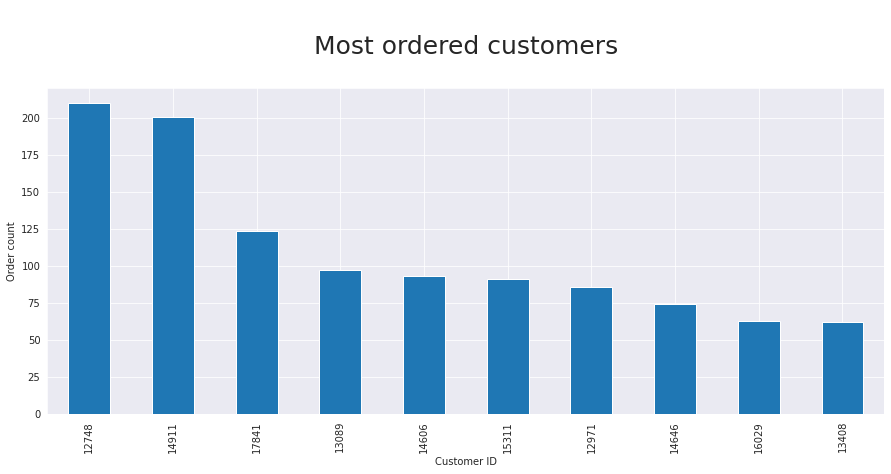

In [41]:
plt.figure(figsize=(15,6))
# Filtering only Quantity > 0, which only considers the orders which wasn't cancelled.
top_10_customers = retail_df[retail_df['Quantity']>0].groupby(['CustomerID'])['InvoiceNo'].nunique().nlargest(10)
top_10_customers.plot(kind='bar')
plt.ylabel('Order count')
plt.xlabel('Customer ID')
plt.title("\n Most ordered customers \n", size=25)
plt.show()

In [42]:
retail_df[retail_df['CustomerID'].isin(top_10_customers.index)]['Country'].unique()

array(['United Kingdom', 'EIRE', 'Netherlands'], dtype=object)

#### **Observations**
- The Top 10 Customers who has placed most of the orders belongs to the Country UK, EIRE and Netherlands.

## **Most Cancelled Customers**

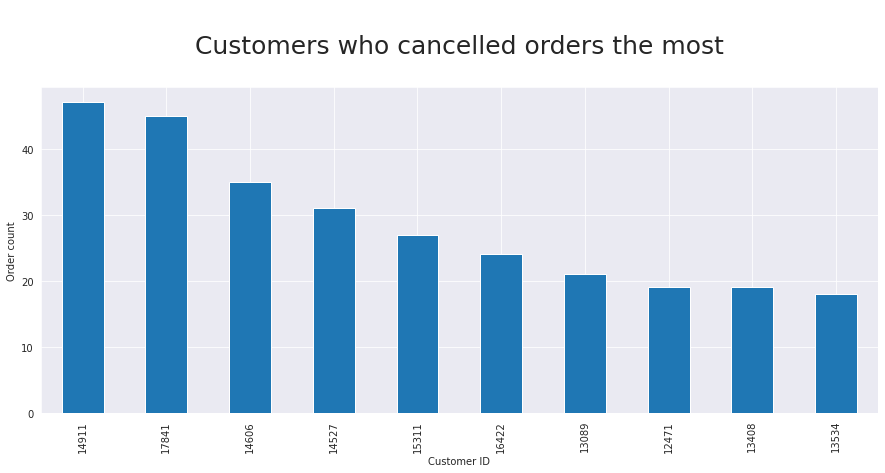

In [43]:
plt.figure(figsize=(15,6))
# Filtering only Quantity < 0, which only considers the orders which was cancelled.
top_10_customers_c = retail_df[retail_df['Quantity']<0].groupby(['CustomerID'])['InvoiceNo'].nunique().nlargest(10)
top_10_customers_c.plot(kind='bar')
plt.ylabel('Order count')
plt.xlabel('Customer ID')
plt.title("\n Customers who cancelled orders the most \n", size=25)
plt.show()

In [44]:
retail_df[retail_df['CustomerID'].isin(top_10_customers_c.index)]['Country'].unique()

array(['United Kingdom', 'EIRE', 'Germany'], dtype=object)

#### **Observations**
- The Top 10 Customers who has Cancelled most of the orders belongs to the Country UK, EIRE, Germany.
- Customers who topped most placed orders also have cancelled most of the orders. This could be because of the reason that these customers transacted more, so the cancellations could be more compared to other customers.

## **Which Country has highest sales?**

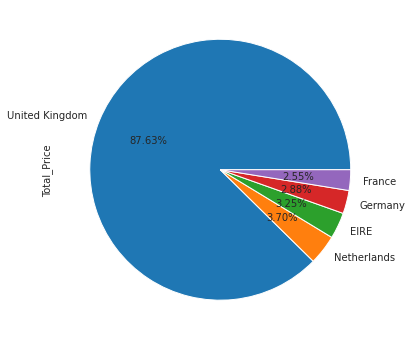

In [45]:
plt.figure(figsize=(15,6))
retail_df.groupby(['Country'])['Total_Price'].sum().nlargest(5).plot(kind='pie',autopct='%1.2f%%') 
plt.show()

#### **Observations**
- Out of total sales across countries, UK has contributed 87.63% in terms of sales. This means it should also have large market base. 

## **Total Number of Customers in each country**

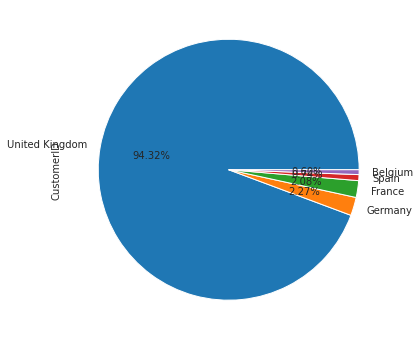

In [46]:
plt.figure(figsize=(15,6))
retail_df.groupby(['Country'])['CustomerID'].nunique().nlargest(5).plot(kind='pie',autopct='%1.2f%%') 
plt.show()

#### **Observations**
- The customer base in UK is very large and 94.32% of the total customers are from UK. 
- This shows further analysis for the UK is required to understand its customers and what possible future opportunities the UK market has to offer.  

In [47]:
# Exporting the treated/cleaned dataset
#with open('/content/drive/MyDrive/new_file.csv', 'w') as new_file:
#  retail_df.to_csv(new_file, index=False) 